PCA on MNIST
This code demonstrates how to implement Principal Component Analysis (PCA) from scratch on the MNIST dataset for dimensionality reduction and visualization. First, the MNIST images (28×28 pixels flattened into 784 features) are loaded and normalized to values between 0 and 1 for numerical stability. The custom pca function then performs the key PCA steps: centering the data by subtracting the mean, computing the covariance matrix, finding its eigenvalues and eigenvectors, sorting them in descending order of importance, selecting the top components, and projecting the data into this reduced space. The dataset is reduced from 784 dimensions to 20, and the first two principal components are plotted, where points are colored by their digit labels to show clustering. Finally, the explained variance of each component can be computed and plotted to see how many components are required to capture most of the dataset’s information.

1. Import libraries


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml


2. Load and preprocess MNIST

In [17]:
mnist, labels = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
# Normalize pixel values from 0–255 → 0–1
mnist = mnist.astype('float32') / 255.0
labels = labels.astype(int)


MNIST has 70,000 images (28×28 pixels flattened into 784 features).
We normalize pixel values for stability in PCA.


3. PCA function (manual implementation)


In [22]:
def pca(x, num_components):
    # Subtract mean - center the data
    x_meaned = x - np.mean(x, axis=0)
    covariance_matrix = np.cov(x_meaned, rowvar=False)
    eigen_values, eigen_vectors = np.linalg.eigh(covariance_matrix)
    # Sort eigen vectors by eigen values
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvectors = eigen_vectors[:, sorted_index]
    eigenvectors_subset = sorted_eigenvectors[:, :num_components]
    # 6. Project data
    x_reduced = np.dot(x_meaned, eigenvectors_subset)
    return x_reduced, eigenvectors_subset



This is a from-scratch PCA implementation (no sklearn.PCA).
Steps: Center → Covariance → Eigen decomposition → Sort → Project.



4. Apply PCA to MNIST


In [30]:
    num_pcs = 20
    mnist_reduced, eigenvector_subset  = pca(mnist, num_pcs)
    # print("Reduced MNIST"+ mnist_reduced)
    print("Reduced MNIST" + str(mnist_reduced.shape))

Reduced MNIST(70000, 20)


Now MNIST (784D) is reduced to 20 principal components.


5. Visualize the first 2 principal components

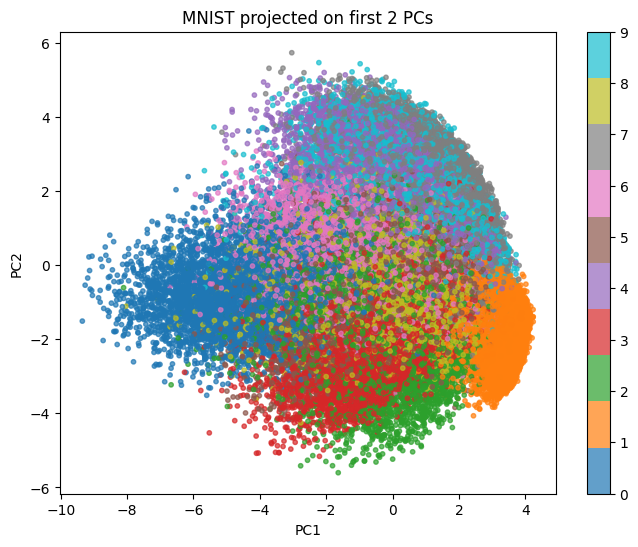

In [31]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(mnist_reduced[:, 0], mnist_reduced[:, 1],
                      c=labels, cmap='tab10', alpha=0.7, s=10)
plt.colorbar(scatter)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("MNIST projected on first 2 PCs")
plt.show()


This shows how the digits separate in PC1 vs PC2 space.
You’ll notice some clusters (like 0s, 1s, 7s) but also overlap.

6. Explained Variance (Optional)

We can calculate variance explained by each principal component:

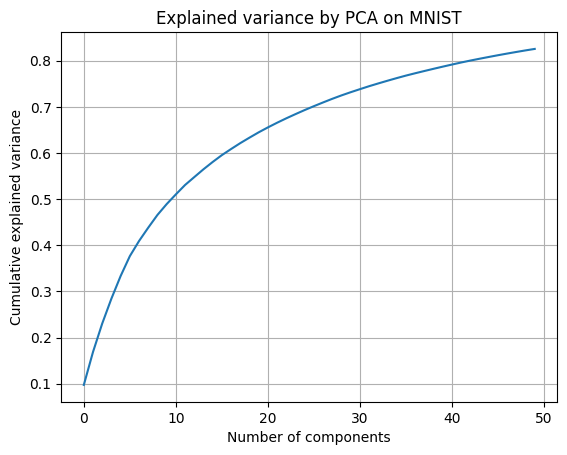

In [32]:
# Recalculate eigenvalues for explained variance
X_meaned = mnist - np.mean(mnist, axis=0)
covariance_matrix = np.cov(X_meaned, rowvar=False)
eigenvalues, _ = np.linalg.eigh(covariance_matrix)
eigenvalues = np.sort(eigenvalues)[::-1]

explained_variance_ratio = eigenvalues / np.sum(eigenvalues)

plt.plot(np.cumsum(explained_variance_ratio[:50]))
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance by PCA on MNIST")
plt.grid()
plt.show()


 PCA Decompression on MNIST

1. Decompress the reduced MNIST

In [33]:
mnist_decompressed = np.dot(mnist_reduced, eigenvector_subset.T) + np.mean(mnist, axis=0)

print("Original shape:", mnist.shape)
print("Decompressed shape:", mnist_decompressed.shape)

Original shape: (70000, 784)
Decompressed shape: (70000, 784)


mnist_decompressed is a reconstructed version of MNIST, but with some information lost (since we only kept 20 PCs).

2. Define a visualization function

In [35]:
def visualize_decompression(original, decompressed, img_shape, num_images=5, title=""):
    original = original.reshape(-1, *img_shape)
    decompressed = decompressed.reshape(-1, *img_shape)

    plt.figure(figsize=(10, 4))

    for i in range(num_images):
        # Show original
        plt.subplot(2, num_images, i + 1)
        plt.imshow(original[i], cmap="gray")
        plt.axis('off')
        if i == 0:
            plt.title("Original")

        # Show decompressed
        plt.subplot(2, num_images, num_images + i + 1)
        plt.imshow(decompressed[i], cmap="gray")
        plt.axis('off')
        if i == 0:
            plt.title("Reconstructed")

    plt.tight_layout()
    plt.show()


This function compares original MNIST images vs. PCA-reconstructed images.

Top row = original images.

Bottom row = decompressed (approximation from PCA).

img_shape=(28,28) restores the flat 784 vector back into image form.

3. Visualize Original vs. PCA Reconstruction

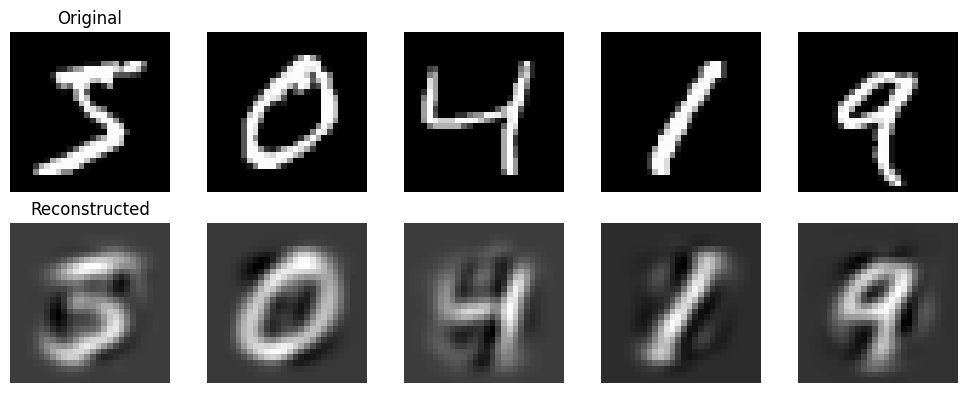

In [36]:
visualize_decompression(mnist[:5], mnist_decompressed[:5], img_shape=(28, 28), title="MNIST PCA Reconstruction")